<a href="https://colab.research.google.com/github/kwhkim/deep-learning-models/blob/main/chapter01/ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build TensorFlow Input Pipelines

The **tf.data** API enables creation of complex input pipelines from simple, reusable pieces. It facilitates handling of large amounts of data, reading from different data formats, and performing complex transformations. The tf.data API introduces a **tf.data.Dataset** abstraction that represents a sequence of elements where each element consists of one or more components.

Comprehensive resource on the tf.data.Dataset:

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

A TensorFlow dataset can be created in two distinct ways. A data source constructs a dataset from data stored in memory or in one or more files. Or, a data transformation constructs a dataset from one or more tf.data.Dataset objects.

Comprehensive resource on TensorFlow input pipelines:

https://www.tensorflow.org/guide/data

# Basic Mechanics

To create an input pipeline, start with a data source. We can construct a dataset from data in memory with from_tensors() or from_tensor_slices().Alternatively, we can use TFRecordDataset() for data stored in a file in the recommended TFRecord format.

Once a data source is created, we transform it into a new dataset by chaining method calls on the tf.data.Dataset object. The dataset object is a Python iterable that can be consumed with a for loop.

Comprehensive resource on performance optimization with the tf.data API:

https://www.tensorflow.org/guide/data_performance

# Google Developers Codelabs

Even after you work through the examples in this book, you may want to add to your deep learning application knowledge by exploring additional tutorials. **Google Developers Codelabs** provide guided tutorials emphasizing hands-on coding examples. Most codelabs step you through the process of building a small application or adding a new feature to an existing application. They cover a wide range of topics such as Android Wear, Google Compute Engine, Project Tango, and Google APIs on iOS.

To peruse the Codelabs website, visit:

https://codelabs.developers.google.com/

# Import **tensorflow** Library

Import tensorflow library and alias as **tf**:

In [1]:
import tensorflow as tf

# GPU Hardware Accelerator

To vastly speed up processing, we can use the GPU available from the Google Colab cloud service. Colab provides a free Tesla K80 GPU of about 12 GB. It’s very easy to enable the GPU in a Colab notebook:

1.	click **Runtime** in the top left menu
2.	click **Change runtime** type from the drop-down menu
3.	choose **GPU** from the Hardware accelerator drop-down menu
4.	click **SAVE**

Verify that GPU is active:

In [2]:
tf.__version__, tf.test.gpu_device_name()

('2.8.2', '/device:GPU:0')

If '/device:GPU:0' is displayed, the GPU is active. If '..' is displayed, the regular CPU is active.

# Create a TensorFlow Dataset

Create a dataset with three tensors with six elements each:

In [3]:
data = [[8, 5, 7, 3, 9, 1],
        [0, 3, 1, 8, 5, 7],
        [9, 9, 9, 0, 0, 7]]

dataset = tf.data.Dataset.from_tensor_slices(data)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(6,), dtype=tf.int32, name=None)>

We transformed a dataset into a tf.data.Dataset object with **from_tensor_slices**, which creates a dataset with a separate element for each row of the input tensor. The shape is (6,), which means that each row contains 6 scalar values. 

6 is important because it is the dimension of input!!

# Consume the Dataset

Display tensor information:

In [4]:
for i, row in enumerate(dataset):
  print ('row ' + str(i), ':', end=' ')
  print (row.numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


The tf.data.Dataset object is a Python iterable that we consume with a for loop. The **numpy()** method explicitly converts a Tensor to a numpy array.

Alternatively, we can use the **take** method with a tf.data.Dataset:

In [6]:
for e in dataset.take(1):
  print (e.numpy())

[8 5 7 3 9 1]


Another option is to create a Python iterator:

In [7]:
# create iterator
it = iter(dataset)

# display elements
print (next(it).numpy())
print (next(it).numpy())
print (next(it).numpy())

[8 5 7 3 9 1]
[0 3 1 8 5 7]
[9 9 9 0 0 7]


 Use **iter** to create a Python iterator. Consume iterator elements with the **next** method.

# Dataset Structure

The **Dataset.element_spec** allows inspection of the dataset. The property returns a nested structure of tf.TypeSpec objects that match the structure of the element, which may be a single component, a tuple of components, or a nested tuple of components.

Inspect the dataset and its type:

In [8]:
dataset.element_spec

TensorSpec(shape=(6,), dtype=tf.int32, name=None)

In [9]:
type(dataset.element_spec)

tensorflow.python.framework.tensor_spec.TensorSpec

In [14]:
#dataset.element_spec[0] # TypeError
#dataset.element_spec['shape'] # TypeError
dataset.element_spec.shape

TensorShape([6])

Alternatively, we can just display the tf.data.Dataset object:

In [15]:
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(6,), dtype=tf.int32, name=None)>

# Create a Dataset from Memory

If all of your input data fits in memory, the simplest way to create a Dataset is to convert it to tf.Tensor objects and use Dataset.from_tensor_slices().

## Load Data into Memory

Load train and test data directly:

In [16]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Inspect types:

In [17]:
type(train[0]), type(train[1])

(numpy.ndarray, numpy.ndarray)

Train and test sets are tuples. For both, the first tuple element contains feature images and the second contains labels.

In [18]:
train[0].shape

(60000, 28, 28)

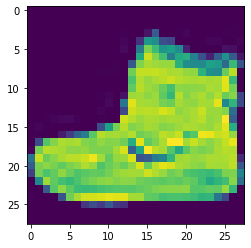

In [23]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0,:,:])

## Access Images and Labels

Load images and labels into variables:

In [24]:
train_img, train_lbl = train
test_img, test_lbl = test

## Inspect Shapes

Display train and test shapes:

In [25]:
print ('train:', train_img.shape, train_lbl.shape)
print ('test:', test_img.shape, test_lbl.shape)

train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


Train data consists of 60,000 28 x 28 feature images and 60,000 labels. Test data consists of 10,000 28 x 28 feature images and 10,000 labels.

## Scale and Create tf.data.Dataset

Scale data for efficient processing and create Dataset:

In [26]:
train_image = train_img / 255.0
test_image = test_img / 255.0

train_ds = tf.data.Dataset.from_tensor_slices(
    (train_image, train_lbl))
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_image, test_lbl))

Feature image pixel values are typically integers that range from 0 to 255. To scale, divide feature images by 255 to get pixels values that range from 0 to 1.

Scaling images is a critical preprocessing step because deep learning models train faster on smaller images. Moreover, many deep learning model architectures require that our images are the same size. But raw images may vary in size.

## Verify Scaling

Let's see if scaling worked as expected. Display a tensor a prescaled tensor:

In [27]:
train_img[0][3]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 13, 73,
        0,  0,  1,  4,  0,  0,  0,  0,  1,  1,  0], dtype=uint8)

Display the same tensor after it is scaled:

In [28]:
train_image[0][3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.05098039, 0.28627451, 0.        , 0.        , 0.00392157,
       0.01568627, 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.00392157, 0.        ])

Voilà!

## Check Image Shape

Fashion-MNIST images are sized equally. But, let's check:

In [29]:
for img, lbl in train_ds.take(5):
  print ('image shape:', img.shape, end=' ')
  print ('label:', lbl.numpy())

image shape: (28, 28) label: 9
image shape: (28, 28) label: 0
image shape: (28, 28) label: 0
image shape: (28, 28) label: 3
image shape: (28, 28) label: 0


We don't need to resize images because they sized equally.

## Inspect Tensors

Check tf.data.Dataset:

In [30]:
train_ds, test_ds

(<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>)

## Create Variable to Hold Input Shape

Assign variable feature image shape for use in model:

In [31]:
for img, _ in train_ds.take(1):
  img.shape

img_shape = img.shape
img_shape

TensorShape([28, 28])

## Visualize

Visualize an element from the train set:

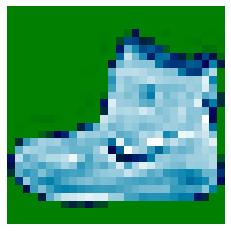

In [32]:
import matplotlib.pyplot as plt

for feature, label in train_ds.take(1):
  plt.imshow(feature, cmap='ocean')
plt.axis('off')
plt.grid(b=None)

## Define Class Labels

From experience working with Fashion-MNIST, we know the corresponding label names:

In [33]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
                'Ankle boot']

## Convert Numerical Label to Class Label

Labels are numerical in the tf.data.Dataset, but we can see the corresponding class name using the **class_labels** list we just created:

In [34]:
for _, label in train_ds.take(1):
  print ('numerical label:', label.numpy())
print ('class label:', class_labels[label.numpy()])

numerical label: 9
class label: Ankle boot


##Create a Plot of Examples from the Dataset

Select images from the train set:

In [35]:
num = 30
images, labels = [], []
for feature, label in train_ds.take(num):
  images.append(tf.squeeze(feature.numpy()))
  labels.append(label.numpy())

Create a function to display a grid of examples:

In [36]:
def display_grid(feature, target, n_rows, n_cols, cl):
  plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(feature[index], cmap='twilight',
                 interpolation='nearest')
      plt.axis('off')
      plt.title(cl[target[index]], fontsize=12)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)

Invoke the function:

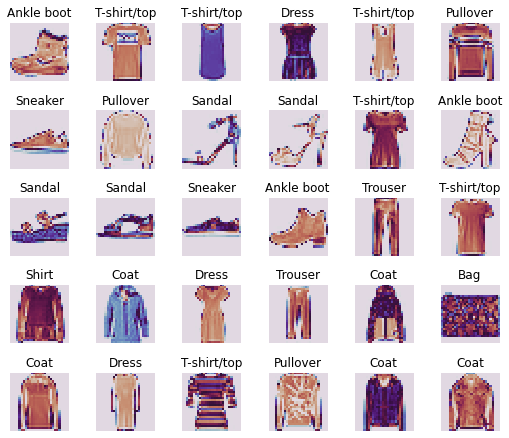

In [37]:
rows, cols = 5, 6
display_grid(images, labels, rows, cols, class_labels)

# Build the Input Pipeline

## Configure Dataset for Performance

Use buffered prefetching and caching to improve I/O performance. Shuffle data to ensure a better overall model.

**Prefetching** overlaps the preprocessing and model execution of a training step. While the model is executing training step **s**, the input pipeline is reading the data for step **s+1**. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data. The tf.Dataset.prefetch transformation overlaps data preprocessing and model execution while training.

The **tf.data.Dataset.cache** keeps the images in memory after they're loaded off disk during the first epoch, which ensures that the dataset does not become a bottleneck while training your model. As a result, caching save some operations (like file opening and data reading) from being executed during each epoch.

**Shuffling** data serves the purpose of reducing variance and making sure that models remain general and overfits less. The obvious case where you'd shuffle your data is if your data is sorted by their class/target. Here, you will want to shuffle to make sure that your training/test/validation sets are representative of the overall distribution of the data.

Resource:

https://www.tensorflow.org/guide/data_performance

In [ ]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

train_f = train_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
train_fm = train_f.cache().prefetch(1)

test_f = test_ds.batch(BATCH_SIZE)
test_fm = test_f.cache().prefetch(1)

Shuffle train data. Batch, cache, and prefetch train and test data. Adding **cache()** increases performance because data is read and written only once during the first epoch rather than during each epoch. Adding **prefetch(1)** is a good idea because it adds efficiency to the batching process. That is, while our training algorithm is working on one batch, TensorFlow is working on the dataset in parallel to get the next batch ready. So, prefectch can dramatically improve training performance.

We set batch size and shuffle size based on trial and error experiments. You can experiment by adjusting batch and shuffle sizes.

Inspect tensors:

In [ ]:
train_fm, test_fm

# Build Model

Import requisite libraries:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

Clear previous models and generate a seed:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create the model:

In [ ]:
model = Sequential([
  Flatten(input_shape=img_shape),
  Dense(128, activation='relu'),
  Dropout(0.4),
  Dense(10, activation=None)
])

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as *Dense*, have parameters that are learned during training.

The first layer in this network is a **Flatten** layer, which transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn because it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two Dense layers. **Dense** layers are fully connected neural layers, which means that all the neurons in a layer are connected to those in the next layer.

The first Dense layer has 128 nodes (or neurons). We add a **Dropout** layer after the first Dense layer to reduce overfitting. The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates that the current image belongs to one of the 10 classes.

**Dropout** is a regularization method that approximates training a large number of neural networks with different architectures in parallel. During training, some number of layer outputs are randomly ignored or 'dropped out', which has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different 'view' of the configured layer.

Inspect model:

In [ ]:
model.summary()

# Compile

Compile the model with **SparseCategoricalCrossentropy** loss. Sparse categorical cross entropy performs well when classes are mutually exclusive. That is, each sample belongs exactly to one class. An advantage of using sparse categorical cross entropy is that it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

The from_**logits=True** attribute informs the loss function that the output values generated by the model are not normalized. That is, the softmax function has not been applied on them to produce a probability distribution.

In [ ]:
model.compile(optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Train

Train the model with 10 epochs:

In [ ]:
epochs = 10
history = model.fit(train_fm, epochs=epochs,
                    verbose=1, validation_data=test_fm)

# Load a TensorFlow Dataset (TFDS) in a Single Batch

This is an **excellent** way to conveniently convert TFDS to numpy arrays. TFDS is covered in detail in a later chapter.

## Create Numpy Datasets with tfds.load

We load the **MNIST** dataset for this example.

Create numpy train set:

In [ ]:
import tensorflow_datasets as tfds

image_train, label_train = tfds.as_numpy(
    tfds.load(
        'mnist', split='train',
        batch_size=-1, as_supervised=True,
        try_gcs=True))

type(image_train), image_train.shape

By using *batch_size=-1*, we load the full dataset in a single batch. *tfds.load* returns a dictionary by default, a tuple with *as_supervised=True* of *tf.Tensor* or a *np.array* with *tfds.as_numpy*.

The train set contains 60,000 28 x 28 images. The **1** dimension indicates that the data is grayscale. A **grayscale** image is one in which the only colors are shades of gray. That is, it only contains luminance (or brightness) information and no color information.

Be careful that your dataset can fit in memory and that all examples have the same shape.

Create numpy test set:

In [ ]:
image_test, label_test = tfds.as_numpy(
    tfds.load(
        'mnist', split='test',
        batch_size=-1, as_supervised=True,
        try_gcs=True))

type(image_test), image_test.shape

## Inspect Shapes and Pixel Intensity

Get shapes:

In [ ]:
image_train.shape, label_train.shape

In [ ]:
image_test.shape, label_test.shape

Create a function to find the first pixel vector with pixel intensity values. We do this because many of the vectors have zero values:

In [ ]:
def find_intensity(m):
  for i, vector in enumerate(m):
    for j, pixels in enumerate(vector):
      if pixels > 0:
        print (vector)
        return i, j

Invoke the function:

In [ ]:
M = image_train[0]
indx = find_intensity(M)       
image_train[0][indx[0]][indx[1]]

The non-zero values are pixel intensities.

Display the first pixel with intensity greater than zero:

In [ ]:
image_train[0][indx[0]][indx[1]]

## Scale

Since numpy array values are float, we can divide by 255. to scale the pixels:

In [ ]:
train_sc = image_train / 255.0
test_sc = image_test / 255.0

Verify scaling:

In [ ]:
image_train[0][indx[0]][indx[1]], train_sc[0][indx[0]][indx[1]]

## Prepare Data for TensorFlow Consumption

Slice:

In [ ]:
train_mnds = tf.data.Dataset.from_tensor_slices(
    (image_train, label_train))
test_mnds = tf.data.Dataset.from_tensor_slices(
    (image_test, label_test))

Inspect:

In [ ]:
train_mnds, test_mnds

## Build Input Pipeline

Build pipeline:

In [ ]:
BATCH_SIZE = 100
SHUFFLE_SIZE = 10000

train_mnist = train_mnds.shuffle(SHUFFLE_SIZE).\
                         batch(BATCH_SIZE).prefetch(1)
test_mnist = train_mnds.batch(BATCH_SIZE).prefetch(1)

Inspect:

In [ ]:
train_mnist, test_mnist

## Build Model

Earlier, we imported requisite libraries. Since they are already in memory, we don't need to import them again.

Get tensor shape:

In [ ]:
np_shape = image_test.shape[1:]
np_shape

Clear previous models and generate seed:

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
tf.keras.backend.clear_session()

Create model:

In [ ]:
model = Sequential([
  Flatten(input_shape=np_shape),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])

## Compile

Compile with sparse categorical crossentropy. Notice that we don't set **from_logits=True** because we use **softmax** activation to produce a probability distribution.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train

Train for three epochs:

In [ ]:
epochs = 3
history = model.fit(train_mnist, epochs=epochs, verbose=1,
                     validation_data=test_mnist)

Resources:

https://www.tensorflow.org/tutorials/load_data/numpy

https://www.tensorflow.org/tutorials/quickstart/beginner

# Process Flowers Data with a Keras Utility

The **Flowers** dataset is a public one that contains thousands of flower photos distributed into five classes. 

For a nice resource on processing flowers data:

https://www.tensorflow.org/tutorials/load_data/images

For a nice resource on Keras preprocessing, peruse:

https://keras.io/api/preprocessing/

## Import Libraries

Import the Image package:

In [ ]:
import PIL.Image

## Download Flowers Dataset

The dataset contains several thousand photos of flowers in five sub-directories with one flower photo per class. The directory structure is as follows:

flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

Download data with **tf.keras.utils.get_file** utility:

In [ ]:
import pathlib

url1 = 'https://storage.googleapis.com/download.tensorflow.org/'
url2 = 'example_images/flower_photos.tgz'
dataset_url = url1 + url2

data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

**tf.keras.utils.get_file** downloads a file from a URL if it not already in the cache. **pathlib.Path** provides a concrete path to the files.

Grab the number of flower photos available:

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print (image_count)

There are available 3670 images.

The **data_dir** path points to directories that each hold a different type of flower. Let's see the directories:

In [ ]:
dirs = [item.name for item in data_dir.glob('*')\
        if item.name != 'LICENSE.txt']
dirs

Access some of the files:

In [ ]:
files = tf.data.Dataset.list_files(str(data_dir/'*/*'))
fn = []
for f in files.take(4):
  print(f.numpy()), fn.append(str(f.numpy()))

Display labels from each file:

In [ ]:
from pathlib import Path

label = []
for i in range(4):
  parts = Path(fn[i]).parts
  label.append(parts[5])
  print (parts[5])

Each directory contains images of that type of flower. Here is the first flower in the daisy directory:

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
parts = Path(daisy[0]).parts
x = ' '
print (25 * x, parts[5])
PIL.Image.open(str(daisy[0]))

Number of daisy images:

In [ ]:
len(daisy)

###Display Several Flower Images

Get flower type:

In [ ]:
roses = list(data_dir.glob('roses/*'))
str(roses[0])

Grab labels from some of the files:

In [ ]:
label = []
for i in range(4):
  tup = Path(str(roses[i])).parts
  label.append(tup[5])

Display:

In [ ]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i + 1)
  pix = np.array(PIL.Image.open(str(roses[i])))
  plt.imshow(pix)
  plt.title(label[i])
  plt.axis('off')

Notice that images are not of the same size.

## Load using tf.keras.preprocessing

Load images off disk using image_dataset_from_directory.

### Set Parameters

Set batch size, image height, and image width:

In [ ]:
BATCH_SIZE = 32
img_height = 180
img_width = 180

We can tell from the displayed roses that image size differs.

### Create Train and Test Sets

The **tf.keras.preprocessing.image_dataset_from_directory** generates a *tf.data.Dataset* from image files in a directory. The utility allows us to conveniently split data, seed, resize, and batch.

Split data 80/20:

The combination of the **validation_split** and **subset** parameters determines the train and test split.

Set aside 80% for train data:

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='training',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Set aside 20% for test data:

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

### Inspect Tensors

Display tensors:

In [ ]:
train_ds, test_ds

Grab the first batch from the train set:

In [ ]:
for img, lbl in train_ds.take(1):
  print (img.shape, lbl.shape)
flower_shape, just_img = img.shape[1:],\
                         img.shape[1:3]

As expected, batch size is 32 and images are shape 180 x 180 x 3. The **3** value indicates that images have three channels, which means they are RGB (color). Labels have shape (32,) that correspond to the 32 images.

## Get Class Names

We already identified the directory names. But, we can also access them with the **class_names** method from the utility:

In [ ]:
class_names = train_ds.class_names
class_names

## Display Examples

Grab the first batch from the train set and plot some images:

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

## Scale the Data

As noted earlier, a pixel is represented by 256 values. So, RGB channel values are in the [0, 255] range. Since neural networks work better with small values, data is typically scaled to be in the [0, 1] range. Create a function to scale image data:

In [ ]:
def format_image(image, label):
  image = tf.image.resize(image, just_img) / 255.0
  return image, label

## Configure the Dataset for Performance

We use buffered prefetching to get data from disk without having I/O issues. We cache to keep images in memory after they're loaded off disk during the first epoch, which ensures that the dataset does not become a bottleneck while training your model. As a result, caching save some operations (like file opening and data reading) from being executed during each epoch.

## Build the Input Pipeline

Scale, shuffle, cache, and prefetch:

In [ ]:
SHUFFLE_SIZE = 100

train_fds = train_ds.map(format_image).\
  shuffle(SHUFFLE_SIZE).cache().prefetch(1)
test_fds = test_ds.map(format_image).\
  cache().prefetch(1)

Inspect:

In [ ]:
train_fds, test_fds

## Train a Model

For completeness, we show how to train a simple model using the datasets just prepared. The model has not been tuned in any way. The goal is to show the mechanics using the datasets just created.

Resource:

https://www.tensorflow.org/tutorials/images/classification

### Import New Libraries

We need additional libraries to build a Convolutional Neural Network (CNN) model:

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### Get Number of Classes

Hold the number of classes in a variable:

In [ ]:
num_classes = len(class_names)
num_classes

### Clear Previous Models and Generate Seed

Clear any previous models and generate a random seed. We use zero for the seed, but any number can be substituted:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

### Create Model

Create a multilayer CNN:

In [ ]:
flower_model = tf.keras.Sequential([
  Conv2D(32, 3, activation='relu',
         input_shape=flower_shape),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

The first layer scales the data. The second layer contains 32 neurons with a 3 x 3 convolutional kernel (or filter). Activation is **relu**. The third layer uses maximum pooling to reduce the spatial size of a layer by just keeping the maximum values. As such, the pooling layer reduces image dimensionality without losing important features or patterns. The next four layers repeat the same pattern as the second and third layers. The flatten layer converts pooled data into a single column because a Dense layer expects data in this form. The final Dense layer enables classification and prediction. Outputs are normalized because softmax activation is applied to them.

### Compile

Compile with SparseCategoricalCrossentropy() since softmax is applied to outputs:

In [ ]:
flower_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

### Train

Train:

In [ ]:
history = flower_model.fit(
    train_fds,
    validation_data=test_fds,
    epochs=5)

The model is overfitting because validation accuracy is low to the compared to the training accuracy.

For an excellent resource on mitigating overfitting, peruse:

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

# Process Flowers from Google Cloud Storage

As we already know, the flowers dataset is organized into 5 folders. Each folder contains flowers of one kind. The folders are named sunflowers, daisy, dandelion, tulips and roses. The data is hosted in a public bucket on Google Cloud Storage (GCS).

We can read flowers data as JPEG files or as TFRecord files. We begin by reading flowers as JPEG files and performing simple processing. We continue by presenting a complete training example with TFRecord files. Modeling TFRecord files is much more efficient than modeling JPEG files. For optimal performance, we read from multiple TFRecord files at once.

The **TFRecord format** is a simple format for storing a sequence of binary records. Tensorflow's preferred file format for storing data is the protobuf-based TFRecord format. A TFRecord file contains a sequence of records, which can only be read sequentially.

## Read Flowers as JPEG Files and Perform Simple Processing

Read file names based on a GCS pattern:

In [ ]:
GCS_PATTERN = 'gs://flowers-public/*/*.jpg'
filenames = tf.io.gfile.glob(GCS_PATTERN)

GCS_PATTERN is a *glob pattern* that supports the * and ? wildcards. **Globs** (also known as glob patterns) are patterns that can expand a wildcard pattern into a list of pathnames that match the given pattern.

For more information on globs, peruse:

https://www.malikbrowne.com/blog/a-beginners-guide-glob-patterns

Grab JPEG images:

In [ ]:
num_images = len(filenames)
print ('Pattern matches {} images.'.format(num_images))

Create a dataset of filenames from GCS_PATTERN and peruse its contents:

In [ ]:
filenames_ds = tf.data.Dataset.list_files(GCS_PATTERN)
for filename in filenames_ds.take(5):
  print (filename.numpy().decode('utf-8'))

Create a function that returns a dataset of (image, label) tuples:

In [ ]:
def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.strings.split(
      tf.expand_dims(filename, axis=-1), sep='/')
  label = label.values[-2]
  return image, label

Map the function to filenames_ds to create a dataset of (image, label) tuples:

In [ ]:
ds = filenames_ds.map(decode_jpeg_and_label)

Peruse:

In [ ]:
for image, label in ds.take(5):
  print (image.numpy().shape,
         label.numpy().decode('utf-8'))

Notice that the processing speed is pretty slow!

Display an image:

In [ ]:
for img, lbl  in ds.take(1):
  plt.axis('off')
  plt.title(lbl.numpy().decode('utf-8'))
  fig = plt.imshow(img)

Although we don't model data with this dataset, let's see how to convert text labels to encoded labels: 

In [ ]:
for img, lbl  in ds.take(1):
  label = lbl.numpy().decode('utf-8')

matches = tf.stack([tf.equal(label, s)\
                    for s in class_names], axis=-1)
one_hot = tf.cast(matches, tf.float32)
print (matches.numpy(), one_hot.numpy())
new_label = tf.math.argmax(one_hot) # transform from one-hot array to class number
new_label.numpy()

Take a label from the dataset. Compare the label against the class name list to find its position in the list. Create a one-hot vector. Finally, convert the one-hot vector into a label tensor. 

## Read and Process Flowers as TFRecord Files

For an excellent resource on processing TFRecord files, peruse:

https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/04_Keras_Flowers_transfer_learning_playground.ipynb#scrollTo=9u3d4Z7uQsmp

Read TFRecord files:

In [ ]:
piece1 = 'gs://flowers-public/'
piece2 = 'tfrecords-jpeg-192x192-2/*.tfrec'
TFR_GCS_PATTERN = piece1 + piece2
tfr_filenames = tf.io.gfile.glob(TFR_GCS_PATTERN)

Get the number of buckets:

In [ ]:
num_images = len(tfr_filenames)
print ('Pattern matches {} image buckets.'.format(num_images))

We grabbed 16 buckets. Since there are 3670 flower files, 15 buckets contain 230 images and the final bucket contains 220 images.

Display a file:

In [ ]:
filenames_tfrds = tf.data.Dataset.list_files(TFR_GCS_PATTERN)
for filename in filenames_tfrds.take(1):
  print (filename.numpy())

### Set Parameters for Training Data

Set parameters for image resizing, pipelining, and number of epochs:

In [ ]:
IMAGE_SIZE = [192, 192]
AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
SHUFFLE_SIZE = 100
EPOCHS = 5

Set parameters for data splits and labels:

In [ ]:
VALIDATION_SPLIT = 0.19
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Create data splits, validation steps, and steps per epoch:

In [ ]:
split = int(len(tfr_filenames) * VALIDATION_SPLIT)
training_filenames = tfr_filenames[split:]
validation_filenames = tfr_filenames[:split]
print ('Splitting dataset into {} training files and {} validation files'\
       .format(len(tfr_filenames), len(training_filenames),
               len(validation_filenames)), end = ' ')
print ('with a batch size of {}.'.format(BATCH_SIZE))

validation_steps = int(3670 // len(tfr_filenames) *\
                       len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(tfr_filenames) *\
                      len(training_filenames)) // BATCH_SIZE
print ('There are {} batches per training epoch and {} '\
       'batches per validation run.'\
       .format(BATCH_SIZE, steps_per_epoch, validation_steps))

### Create Functions to Load and Process TFRecord Files

Create a function to parse a TFRecord file:

In [ ]:
def read_tfrecord(example):
  features = {
      'image': tf.io.FixedLenFeature([], tf.string),
      'class': tf.io.FixedLenFeature([], tf.int64)
  }
  example = tf.io.parse_single_example(example, features)
  image = tf.image.decode_jpeg(example['image'], channels=3)
  image = tf.cast(image, tf.float32) / 255.0 
  image = tf.reshape(image, [*IMAGE_SIZE, 3])
  class_label = example['class']
  return image, class_label

The function accepts an example TFRecord file. A dictionary holds datatypes common to TFRecords. The tf.string data type converts the image to byte strings (list of bytes). The tf.int64 converts the class label to a 64-bit integer scalar value. The example is parsed into (image, label) tuples. The image element, a JPEG-encoded image, is decoded into a uint8 image tensor. The image tensor is scaled to \[0, 1\] range for faster training. It is then reshaped to a standard size for model consumption. The class label element is cast to a scalar. 

Create a function to load TFRecord files as tf.data.Dataset:

In [ ]:
def load_dataset(filenames):
  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False
  dataset = tf.data.TFRecordDataset(
      filenames, num_parallel_reads=AUTO)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

The function accepts TFRecord files. For optimal performance, code is included to read from multiple TFRecord files at once. The options setting allows order-altering optimizations. As such, **n** files are read in parallel and data order is disregarded in favor of reading speed.

Create a function to build an input pipeline from TFRecord files:

In [ ]:
def get_batched_dataset(filenames, train=False):
  dataset = load_dataset(filenames)
  dataset = dataset.cache()
  if train:
    dataset = dataset.repeat()
    dataset = dataset.shuffle(SHUFFLE_SIZE)
  dataset = dataset.batch(BATCH_SIZE)
  dataset = dataset.prefetch(AUTO)
  return dataset

The function accepts TFRecord files and calls the `load_dataset` function. The function continues by building an input pipeline by caching, repeating, shuffling, batching and prefetching the dataset. Repeating and shuffling are only mapped to training data. We follow best practices by repeating and shuffling only the training data.

### Create Train and Test Sets

Instantiate the datasets:

In [ ]:
training_dataset = get_batched_dataset(
    training_filenames, train=True)
validation_dataset = get_batched_dataset(
    validation_filenames, train=False)
training_dataset, validation_dataset

Display an image:

In [ ]:
for img, lbl in training_dataset.take(1):
  plt.axis('off')
  plt.title(CLASSES[lbl[0].numpy()])
  fig = plt.imshow(img[0])
  tfr_flower_shape = img.shape[1:]

### Model Data

Clear and seed:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create the model:

In [ ]:
tfr_model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu',
         input_shape=tfr_flower_shape),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(num_classes, activation='sigmoid')
])

Inspect:

In [ ]:
tfr_model.summary()

Compile:

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

tfr_model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

Train:

In [ ]:
history = tfr_model.fit(training_dataset, epochs=EPOCHS,
                    verbose=1, steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps, 
                    validation_data=validation_dataset)